In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import itertools

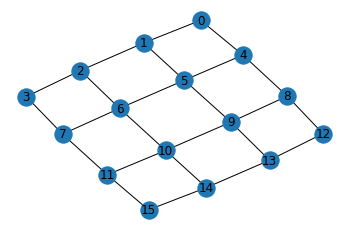

In [44]:
N_lattice = 4
N_species = 100
t_max = 10000
P_migration = 0.01

g = nx.grid_graph([N_lattice, N_lattice], periodic=False)
g = nx.convert_node_labels_to_integers(g)

fig, ax = plt.subplots()
nx.draw(g, with_labels=True)

# create BS networks
idx_node = 0
idx = 0
for node in g.nodes():
    g_species = nx.watts_strogatz_graph(N_species, 3, 0)
    
    for species in g_species:
        g_species.node[species]["id"] = idx
        g_species.node[species]["fitness"] = np.random.random()
        idx += 1
        
    g.nodes[node]["BS"] = nx.relabel_nodes(g_species, mapping={i: idx_node+i for i in range(N_species)})
    idx_node += N_species
    

    
# perform Bak-Sneppen
for t in range(t_max-1):
        
    for node in g.nodes():
        lattice_neighbours = list(g[node])    
   
        bs = g.node[node]["BS"]
        fs = nx.get_node_attributes(bs, "fitness").values()
        
        i = np.argmin(list(fs))
        i = list(nx.get_node_attributes(bs, "fitness").keys())[i]
        nghbrs = list(bs[i])
        
#         if t == 0:
#             min_fitness = f[t,i]
#             av_size = 1
#         elif f[t,i] < min_fitness:
#             av_size += 1
#         else:
#             avs.append(av_size)
#             min_fitness = f[t,i]
#             av_size = 1

        bs.node[i]["id"] = idx
        idx += 1
        bs.node[i]["fitness"] = np.random.random()
        for nghbr in nghbrs:
            bs.node[nghbr]["fitness"] = np.random.random()
            bs.node[nghbr]["id"] = idx
            idx += 1
            
            
#         age[t+1] = age[t] + 1
#         age[t+1, i] = 0
#         age[t+1, idx] = 0

        # migration
        if np.random.random() < P_migration:
            migrator = np.random.choice(bs.nodes)

            migrate_to = np.random.choice(lattice_neighbours)
            target = g.node[migrate_to]["BS"]
            
            n1 = np.random.choice(target.nodes)
            n2 = np.random.choice(list(target[n1]))
            
            target.add_node(idx_node, attr=bs.node[migrator])
            target.remove_edge(n1, n2)
            target.add_edge(n1, idx_node)
            target.add_edge(n2, idx_node)
            idx_node += 1
            
        # extinction
        if np.random.random() < P_migration:
            x = np.random.choice(bs.nodes)
            
            nghbrs = list(bs[x])
            edges = list(itertools.combinations(nghbrs, 2))
            
            bs.remove_node(x)
            bs.add_edges_from(edges)

In [46]:
g.node[0]["BS"].nodes

NodeView((6, 7, 8, 12, 17, 20, 22, 24, 26, 28, 33, 36, 39, 44, 48, 64, 66, 70, 71, 73, 87, 94, 95, 97, 98, 1678, 1792, 1894, 1907, 1926, 2153, 2186, 2197, 2296, 2353, 2368, 2419, 2496, 2502, 2507, 2536, 2567, 2618, 2625, 2660, 2670, 2675, 2792, 2840, 2858, 2881, 2913, 2914, 3034, 3089, 3103, 3125, 3151))

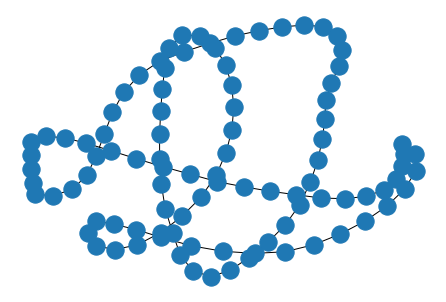

In [45]:
nx.draw(g.node[3]["BS"])

In [47]:
nr_species = [len(g.node[i]["BS"].nodes) for i in g.nodes()]
print(nr_species)
print(np.mean(nr_species))

[58, 103, 91, 97, 126, 121, 120, 131, 114, 106, 120, 107, 67, 115, 93, 64]
102.0625


In [94]:
np.argmin(list(nx.get_node_attributes(g.node[1]["BS"], "fitness").values()))

9

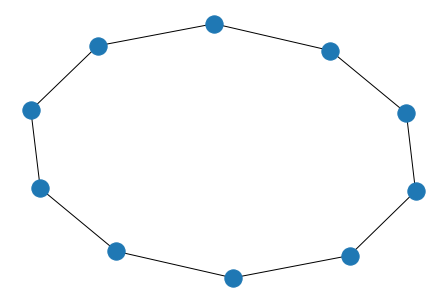

In [28]:
nx.draw(g.nodes[0]["BS"])

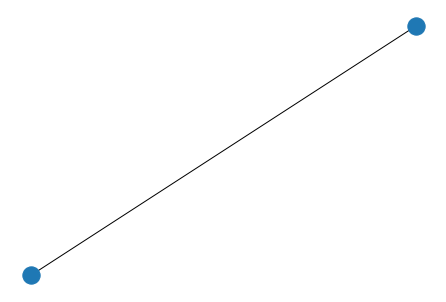

In [19]:
g = nx.Graph()
g.add_node(1, attr={"fitness": 1})
g.add_node(2, attr={"fitness": 2})
g.add_edge(1,2)
nx.draw(g)

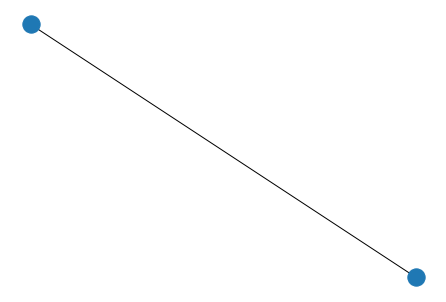

In [20]:
g.add_node(1, attr={"fitness": 3})
nx.draw(g)

In [21]:
g.nodes.data()

NodeDataView({1: {'attr': {'fitness': 3}}, 2: {'attr': {'fitness': 2}}})